In [8]:
import pandas as pd
import seaborn as sns
from datetime import date
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
df = pd.read_csv('car data.csv')

In [10]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [11]:
df.shape

(301, 9)

In [12]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [13]:
df['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [14]:
df['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [15]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [16]:
df['Owner'].unique()

array([0, 1, 3], dtype=int64)

In [17]:
#check is there any NaN or null value in Dataframe 
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [18]:
df['Year'].unique()

array([2014, 2013, 2017, 2011, 2018, 2015, 2016, 2009, 2010, 2012, 2003,
       2008, 2006, 2005, 2004, 2007], dtype=int64)

In [19]:
# Dynamic current year 
current_date = date.today()
df['Current_Year']= current_date.year

In [20]:
df['Current_Year']

0      2021
1      2021
2      2021
3      2021
4      2021
       ... 
296    2021
297    2021
298    2021
299    2021
300    2021
Name: Current_Year, Length: 301, dtype: int64

In [21]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'Current_Year'],
      dtype='object')

In [22]:
newdf = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'Current_Year']]

In [23]:
newdf.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021


In [24]:
#dynamically find number of year old car
newdf['year_old'] = current_date.year - newdf.Year

In [25]:
newdf.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'Current_Year', 'year_old'],
      dtype='object')

In [26]:
newdf = newdf[['Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'year_old']]

In [27]:
newdf = pd.get_dummies(newdf)

In [28]:
# forgot to add drop_first in dummy trap
#removing columns
newdf.columns
newdf = newdf[['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'year_old',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual', 'Transmission_Manual']]

In [29]:
newdf.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,year_old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [30]:
newdf.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,year_old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
year_old,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


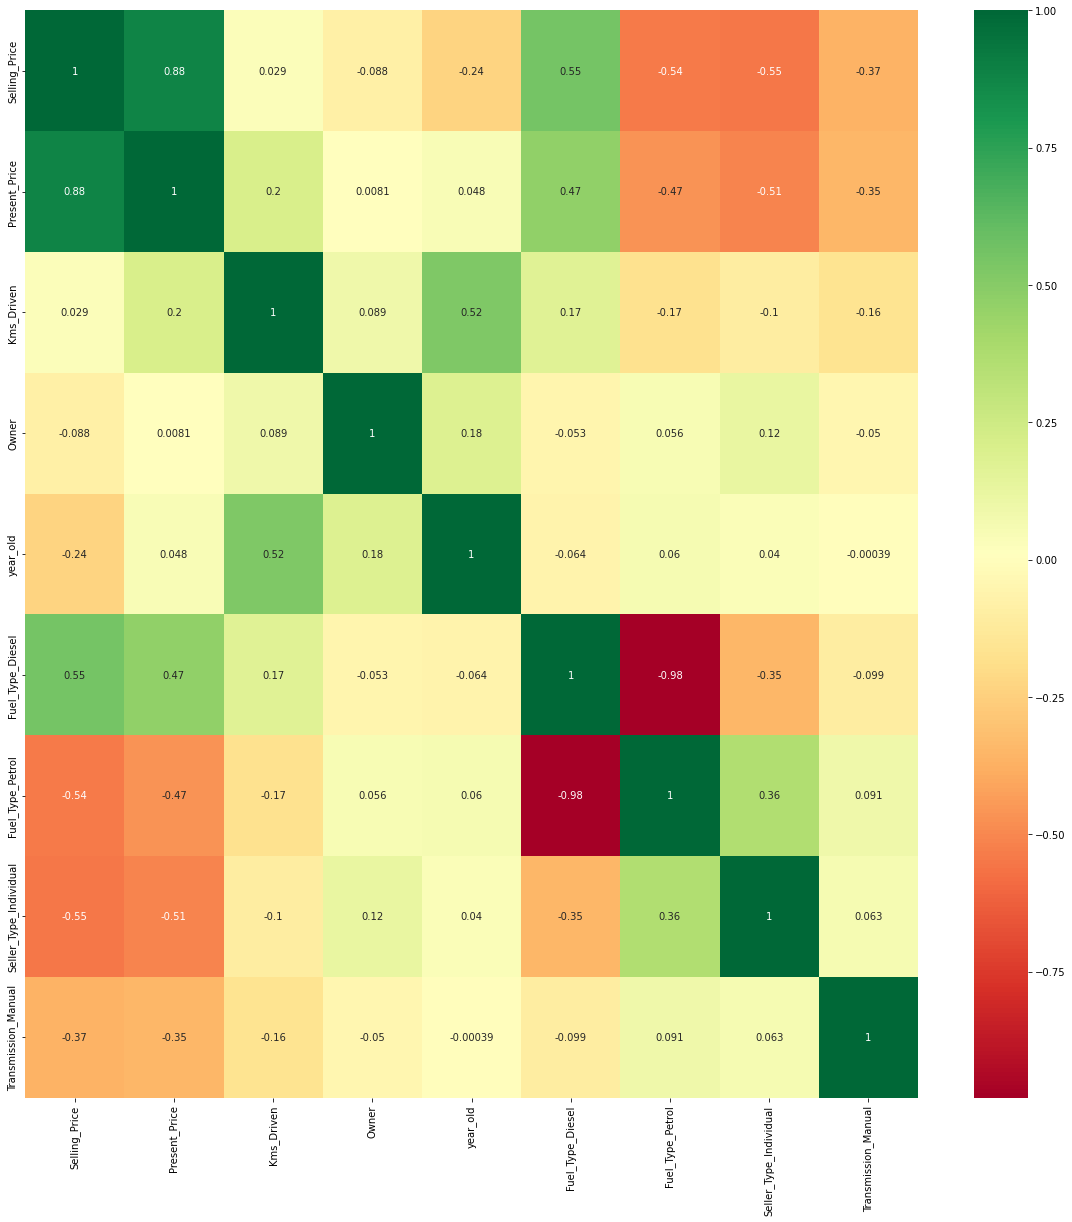

In [35]:
core = newdf.corr()
coreplot = core.index
plt.figure(figsize=(20,20))
p = sns.heatmap(newdf[coreplot].corr(), annot=True, cmap="RdYlGn")

In [36]:
newdf.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,year_old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [37]:
# A is a independant feature and B is the dependent feature 
A = newdf.iloc[:,1:]
B = newdf.iloc[:,0]

In [38]:
A.head()

,Present_Price,Kms_Driven,Owner,year_old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1


In [39]:
B.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [54]:
# Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(A,B)

ExtraTreesRegressor()

In [55]:
model.feature_importances_

array([0.41470915, 0.03528478, 0.00067571, 0.08298912, 0.20414116,
       0.01413957, 0.12793799, 0.12012252])

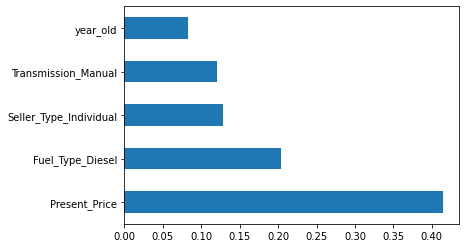

In [57]:
# graph of feature importance
feat_imp = pd.Series(model.feature_importances_, index=A.columns)
feat_imp.nlargest(5).plot(kind='barh')
plt.show()

In [60]:
from sklearn.model_selection import train_test_split
A_train, A_test, B_train, B_test = train_test_split(A,B,test_size=0.2)

In [62]:
A_train.shape

(240, 8)

In [63]:
from sklearn.ensemble import RandomForestRegressor
rf_random = RandomForestRegressor()

In [65]:
import numpy as np
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [66]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [81]:
from sklearn.model_selection import RandomizedSearchCV

In [82]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [83]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [84]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [85]:
rf_random.fit(A_train,B_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [86]:
predictions = rf_random.predict(A_test)

In [87]:
predictions

array([22.62967178, 12.10685058,  5.39213191,  0.63512697,  5.96485321,
        2.86560057,  4.3111001 ,  3.98197417,  5.19427425,  5.24597487,
        0.62627154,  1.24788625,  5.0843644 ,  4.58375696,  5.00847764,
        1.17697188,  1.18359437,  0.6488439 , 18.94124267,  9.0151037 ,
        2.55051844, 22.62967178,  4.69435011,  5.44809806,  9.63386164,
        3.15754975,  4.75029929,  6.93168909,  1.24275054,  0.56111942,
       12.88293034,  5.79090457,  4.75636792,  0.43362731, 22.71760731,
        9.40169295,  5.04377193,  6.28829579,  0.67050971,  1.18948059,
        0.55918154,  1.19224933,  0.61037002,  2.8928518 ,  0.58170909,
        6.95938155, 21.7722268 ,  4.26516989,  1.17552138,  0.58766273,
        0.9104296 ,  3.79807968,  9.15369386,  1.18466291,  0.22190584,
        7.88018978,  7.10406056,  2.86105547,  9.60134597,  2.87730859,
        7.55221498])

<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

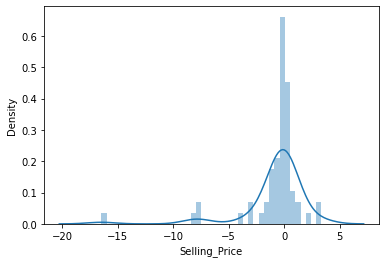

In [92]:
sns.distplot(B_test-predictions)

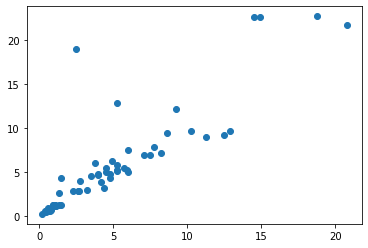

In [93]:
plt.scatter(B_test,predictions)

In [94]:
import pickle

In [97]:
#store file 
file = open('random_forest_regression_model.pkl', 'wb')

#dump information to that file
pickle.dump(rf_random, file)